<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea6/Muestreo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
import pandas as pd
import random
from scipy.stats import norm

Mounted at /content/drive


In [11]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/datos/")
!ls

Matematicas.txt  MinimosCuadratico.txt	MinimosLineal.txt


In [6]:

mate = "/content/drive/MyDrive/Colab Notebooks/datos/Matematicas.txt"
data = np.loadtxt(mate)
print("Datos de Matematicas.txt:", data)


Datos de Matematicas.txt: [68. 84. 75. 82. 68. 90. 62. 88. 76. 93. 73. 79. 88. 73. 60. 93. 71. 59.
 85. 75. 61. 65. 75. 87. 74. 62. 95. 78. 63. 72. 66. 78. 82. 75. 94. 77.
 69. 74. 68. 60. 96. 78. 89. 61. 75. 95. 60. 79. 83. 71. 79. 62. 67. 97.
 78. 85. 76. 65. 71. 75. 65. 80. 73. 57. 88. 78. 62. 76. 53. 74. 86. 67.
 73. 81. 72. 63. 76. 75. 85. 77.]


Media de los datos: 75.25
Mediana de los datos: 75.0


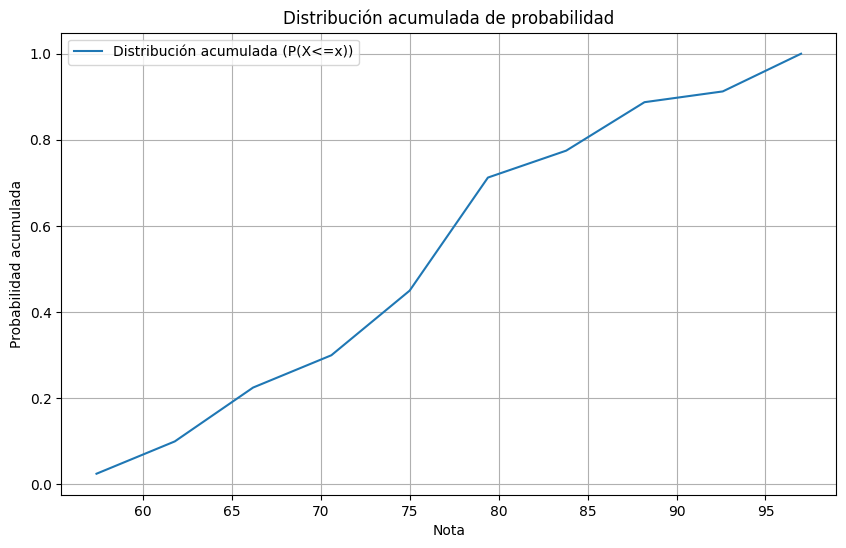

c) Mediana calculada usando la distribución acumulada: 75.00
d) Media del bootstrap: 75.24, Desviación estándar: 1.16


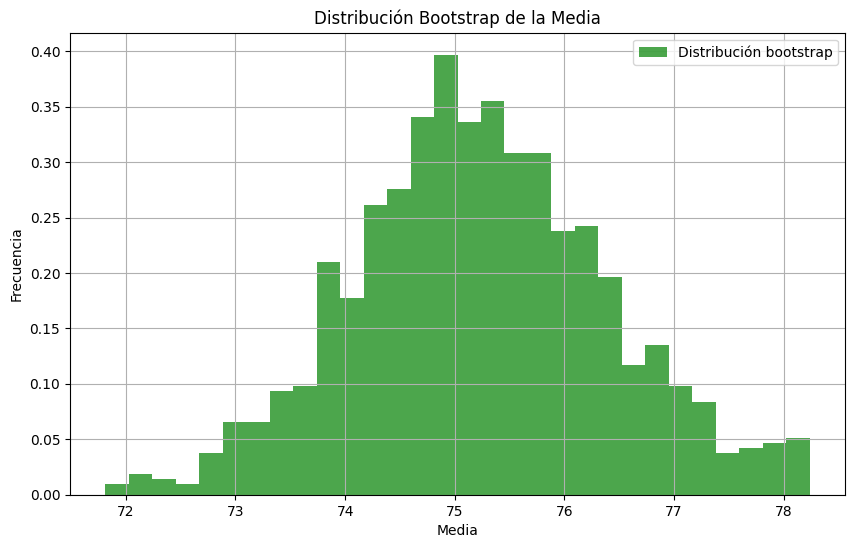

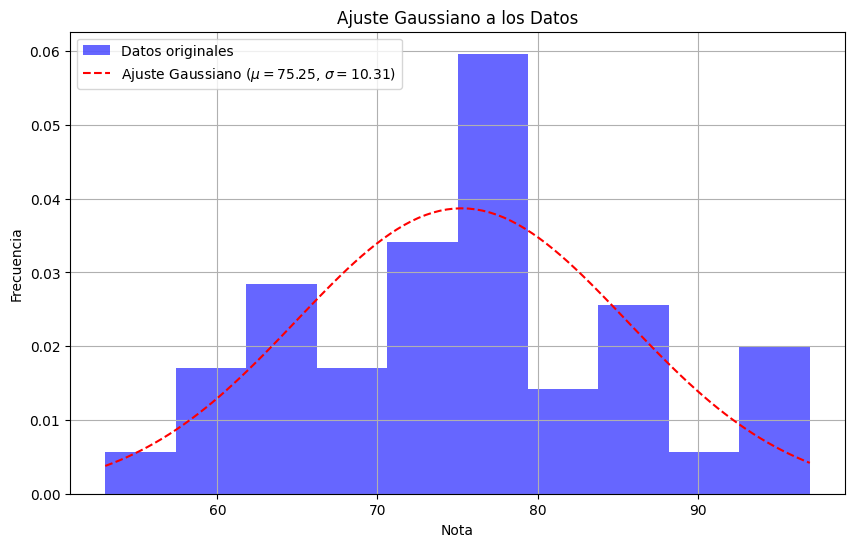

e) Ajuste Gaussiano: Media=75.25, Desviación estándar=10.31
f) Mediana del bootstrap usando la función acumulada: 75.19

g) Comparación de estimaciones:
   Media original: 75.25
   Media bootstrap: 75.24
   Mediana original: 75.00
   Mediana bootstrap: 75.19


In [11]:
#a
mean_data=np.mean(data)
print("Media de los datos:", mean_data)
#b
median=np.percentile(data,50)
print("Mediana de los datos:", median)
#c
# c) Distribución de frecuencia acumulada y acumulada de probabilidad
hist, bin_edges = np.histogram(data, bins=10, density=True)
cumulative_prob = np.cumsum(hist * np.diff(bin_edges))  # Calcular P(X <= x)

# Graficar la distribución acumulada de probabilidad
plt.figure(figsize=(10, 6))
plt.plot(bin_edges[1:], cumulative_prob, label="Distribución acumulada (P(X<=x))")
plt.xlabel("Nota")
plt.ylabel("Probabilidad acumulada")
plt.title("Distribución acumulada de probabilidad")
plt.grid()
plt.legend()
plt.show()

# Calcular el valor de la mediana en la distribución acumulada
median_cdf = bin_edges[np.searchsorted(cumulative_prob, 0.5)]
print(f"c) Mediana calculada usando la distribución acumulada: {median_cdf:.2f}")

# d) Bootstrapping para analizar la variabilidad
bootstrap_samples = 1000
bootstrap_means = [
    np.mean(random.choices(data, k=len(data))) for _ in range(bootstrap_samples)
]

# Calcular media y desviación estándar del bootstrap
mean_bootstrap = np.mean(bootstrap_means)
std_bootstrap = np.std(bootstrap_means)
print(f"d) Media del bootstrap: {mean_bootstrap:.2f}, Desviación estándar: {std_bootstrap:.2f}")

# Graficar la distribución bootstrap
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.7, color='g', label="Distribución bootstrap")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.title("Distribución Bootstrap de la Media")
plt.grid()
plt.legend()
plt.show()

# e) Ajuste gaussiano
(mu, sigma) = norm.fit(data)
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, sigma)

# Graficar ajuste gaussiano
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, density=True, alpha=0.6, color='b', label="Datos originales")
plt.plot(x, pdf, 'r--', label=f"Ajuste Gaussiano ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)")
plt.xlabel("Nota")
plt.ylabel("Frecuencia")
plt.title("Ajuste Gaussiano a los Datos")
plt.grid()
plt.legend()
plt.show()

print(f"e) Ajuste Gaussiano: Media={mu:.2f}, Desviación estándar={sigma:.2f}")

# f) Mediana del bootstrap usando la función acumulada
bootstrap_cdf = np.percentile(bootstrap_means, 50)
print(f"f) Mediana del bootstrap usando la función acumulada: {bootstrap_cdf:.2f}")

# g) Comparación de estimaciones
print("\ng) Comparación de estimaciones:")
print(f"   Media original: {mean_data:.2f}")
print(f"   Media bootstrap: {mean_bootstrap:.2f}")
print(f"   Mediana original: {median:.2f}")
print(f"   Mediana bootstrap: {bootstrap_cdf:.2f}")